In [39]:
import datetime as dt
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import quandl as quandl
import statsmodels.formula.api as smf
pd.set_option('display.float_format', lambda x: '%.9f' % x)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import requests
import os 
#ql.ApiConfig.api_key = os.getenv('quandl_key')

 # Return Forecasting:  Read Historical Daily Yen Futures Data from Quandl
## In this activity, you will pull historical Dollar-Yen exchange rate futures data from Quandl and test whether there is any predictable behavior using time-series models.

 * First, you'll need to download the futures data using the Quandl API, and return it as a Pandas DataFrame.
 * You'll need a Quandl API key (free): https://www.quandl.com/
 * (Use code "CHRIS/CME_JY1")
 * Trim the resulting data to include only from the the year 1990 through today.

In [40]:
api_key = os.getenv("QUANDL_API_KEY")
fut = quandl.get("CHRIS/CME_JY1", authtoken=api_key)

In [41]:
fut.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.000000000,3401.000000000,3398.000000000,3401.000000000,nan,3401.000000000,2.000000000,1.000000000
1976-08-03,3401.000000000,3401.000000000,3401.000000000,3401.000000000,nan,3401.000000000,0.000000000,1.000000000
1976-08-04,3401.000000000,3401.000000000,3401.000000000,3401.000000000,nan,3401.000000000,0.000000000,1.000000000
1976-08-05,3401.000000000,3401.000000000,3401.000000000,3401.000000000,nan,3401.000000000,0.000000000,1.000000000
1976-08-06,3401.000000000,3401.000000000,3401.000000000,3401.000000000,nan,3401.000000000,0.000000000,1.000000000


In [42]:
fut = fut.loc['1990':]
fut.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.000000000,6954.000000000,6835.000000000,6847.000000000,nan,6847.000000000,48336.000000000,51473.000000000
1990-01-03,6877.000000000,6910.000000000,6865.000000000,6887.000000000,nan,6887.000000000,38206.000000000,53860.000000000
1990-01-04,6937.000000000,7030.000000000,6924.000000000,7008.000000000,nan,7008.000000000,49649.000000000,55699.000000000
1990-01-05,6952.000000000,6985.000000000,6942.000000000,6950.000000000,nan,6950.000000000,29944.000000000,53111.000000000
1990-01-08,6936.000000000,6972.000000000,6936.000000000,6959.000000000,nan,6959.000000000,19763.000000000,52072.000000000


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

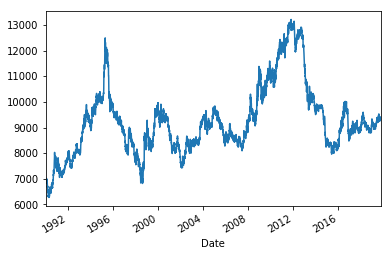

In [43]:
fut.Settle.plot()

In [44]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE 

 # Return Forecasting: MA/EWMA Smoothing of Futures Prices

 1. Plot the Settle Price, along with a moving average of 15 and 60 days. Use indexing to just plot the data from 2015 onward.
 2. What do you see now, in terms of short versus long-term trends?
 3. Try an exponential moving average, with a half life of 15 days.
 4. Which seems to respond faster, an exponential moving average with a half life of 15 days, or a moving average of 15 days?

 (15 days = 3 weeks)
 (60 days = 3 months)

In [45]:
df=fut[["Settle"]].copy()
df = df.loc['1990':]
df.head()

,Settle
Date,
1990-01-02,6847.000000000
1990-01-03,6887.000000000
1990-01-04,7008.000000000
1990-01-05,6950.000000000
1990-01-08,6959.000000000


In [46]:
df['MA15'] = df['Settle'].sort_index(ascending=True).rolling(window=15).mean()
df['MA60'] = df['Settle'].sort_index(ascending=True).rolling(window=60).mean()
df['EWM15'] = df['Settle'].sort_index(ascending=True).ewm(halflife=15).mean()
df.tail()

,Settle,MA15,MA60,EWM15
Date,,,,
2019-10-02,9373.500000000,9315.100000000,9353.608333333,9342.107989536
2019-10-03,9397.500000000,9325.166666667,9355.741666667,9344.609403884
2019-10-04,9399.500000000,9335.366666667,9358.000000000,9347.088175165
2019-10-07,9360.500000000,9341.900000000,9358.700000000,9347.693831664
2019-10-08,9376.500000000,9347.000000000,9359.791666667,9348.994672023


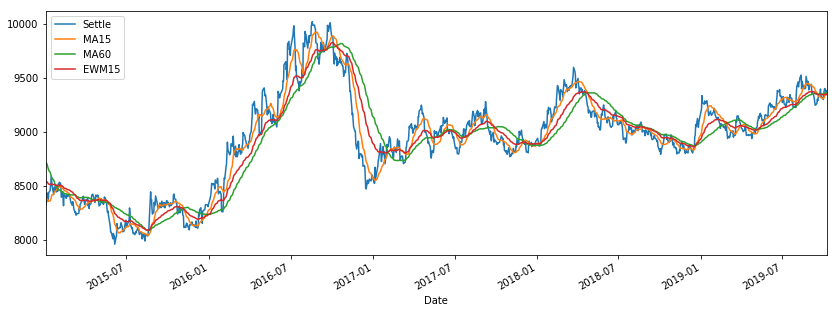

In [47]:
df["2015":].plot(figsize=(14,5))

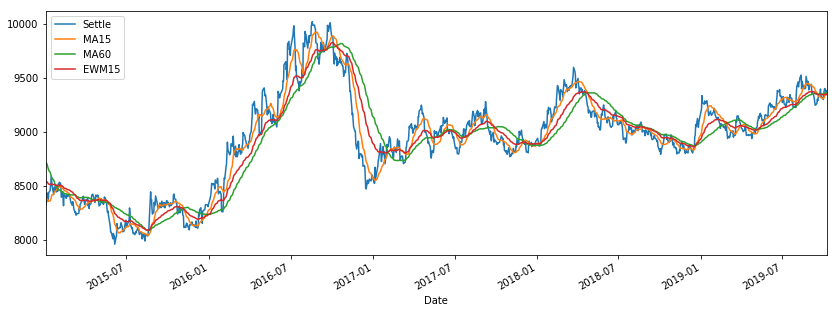

In [48]:
###### Moving averages and exponentially weighted moving averages 
# Create a dataframe using just the "Settle" price
#df=fut[["Settle"]].copy()

# Add in columns for moving average windows of 15 and 60 days, and a column for an EWMA window of 15 days
# YOUR CODE HERE 
# YOUR CODE HERE 
# YOUR CODE HERE 

# Plot the settle price and moving average/ewma columns all in one plot from 2015:
df["2015":].plot(figsize=(14,5))

# Return Forecasting: Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [49]:
import statsmodels.api as sm
# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
ts_noise, ts_trend =  sm.tsa.filters.hpfilter(df['Settle'])
ts_noise.tail()

Date
2019-10-02   27.135881252
2019-10-03   47.504507544
2019-10-04   45.811801895
2019-10-07    3.097941942
2019-10-08   15.374472944
Name: Settle, dtype: float64

In [50]:
# Create a dataframe of just the settle price, and add in the "noise" and "trend" series from above:
futures_decomp =  df[["Settle"]].copy()
#futures_decomp["noise"] =  pd.Series(ts_noise) 
futures_decomp["trend"] =  pd.Series(ts_trend) 
futures_decomp.tail()

,Settle,trend
Date,,
2019-10-02,9373.500000000,9346.364118748
2019-10-03,9397.500000000,9349.995492456
2019-10-04,9399.500000000,9353.688198105
2019-10-07,9360.500000000,9357.402058058
2019-10-08,9376.500000000,9361.125527056


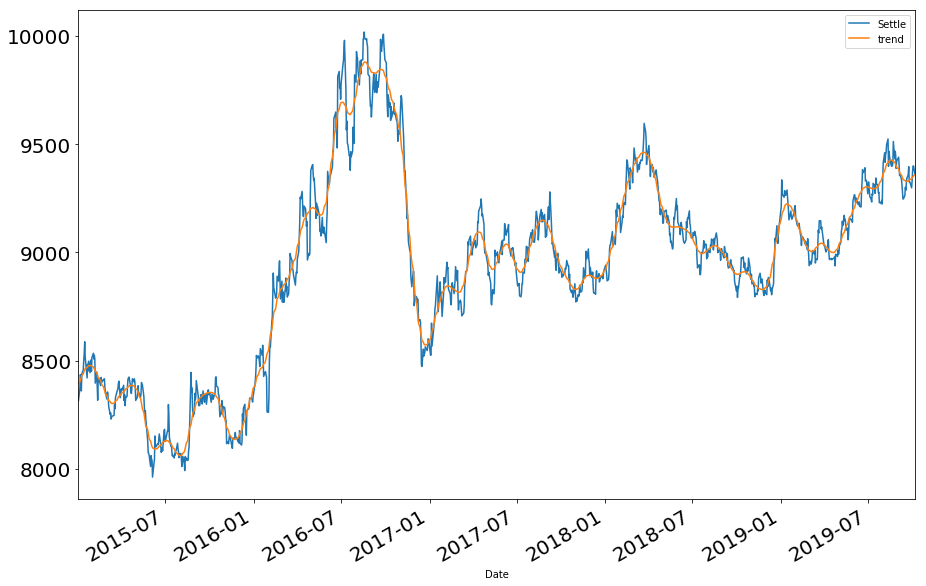

In [51]:
# Plot the "Settle" and "Trend" price 
futures_decomp['2015':].plot(figsize=(15,10), fontsize=20)

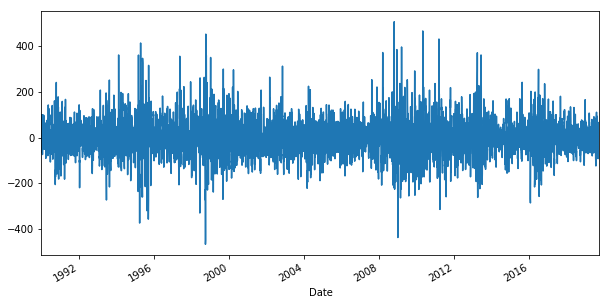

In [52]:
# Then plot the "noise" separately
ts_noise.plot(figsize=(10,5))

In [53]:
import statsmodels.api as sm
# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
ts_noise, ts_trend =  # YOUR CODE HERE 

# Create a dataframe of just the settle price, and add in the "noise" and "trend" series from above:
futures_decomp =  # YOUR CODE HERE 
futures_decomp["noise"] =  # YOUR CODE HERE 
futures_decomp["trend"] =  # YOUR CODE HERE 
futures_decomp

# Plot the "Settle" and "Trend" price 
# YOUR CODE HERE 

# Then plot the "noise" separately
# YOUR CODE HERE 

SyntaxError: invalid syntax (<ipython-input-53-7ef913142949>, line 3)

 # Return Forecasting: Seasonal Effects with Sklearn Linear Regression
 Using the full dataset, use a SKLearn linear regression to predict Yen futures ("settle") returns with *lagged* Yen futures returns and categorical calendar seasonal effects (e.g., day-of-week or week-of-year seasonal effects).


In [ ]:
fut.head()

In [ ]:
#Use the dataframe containing "Settle" Prices:
fut.head()

In [ ]:
from sklearn.linear_model import LinearRegression

# Construct a "Futures Return" column, using pandas pct_change() on the "Settle" price 
# If will be easier to also multiply this by 100, both to read and when we use it with SKLearn:
fut["Futures Return"] = fut["Settle"].copy().pct_change()*100

# Feature Engineering
# Create a second "Lagged Return" variable, that is the futures return variable shifted above, but lagged 1 day:
# We"ll use this lagged return as the feature vector X:
fut["Lagged Return"] = fut["Futures Return"].shift() 
fut = fut.replace(-np.inf, np.nan).dropna()

# Construct a new "X" dataframe using just the "Lagged Return" variable:
X = fut["Lagged Return"].to_frame()

In [ ]:
# Add into the X dataframe either a "dayofweek" or "weekofyear" column, (e.g., using X.index.weekofyear) 
X["Week of Year"] = X.index.weekofyear 

# Create a new categorical X dataframe, by using pd.get_dummies() on the seasonal column created just above:
X_binary_encoded = pd.get_dummies(X, columns=['Week of Year']) 
X_binary_encoded.head()

In [ ]:
# Create a "y" series, using just the "Futures Return" column created above.
y = fut["Futures Return"].copy()

# Construct a "LinearRegression" object:
model = LinearRegression()

# Fit a model using the X and y objects:
results = model.fit(X_binary_encoded, y)
results

In [ ]:
# Construct predictions based on the X object:
predictions = model.predict(X_binary_encoded) 
predictions

 Summarize the quality of your model using R2 and root-mean-squared-error (RMSE) statistics. How good is it?

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate r2_score (r-squared)
r2 = r2_score(y, predictions)
print(f"r2: {r2}")

In [54]:
# Calculate mean squared error 
# (A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.)
mse = mean_squared_error(y, predictions)

# Using mean squared eror above, calculate root-mean-squared error (RMSE)
rmse = np.sqrt(mse) 

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {y.std()}")

Mean Squared Error (MSE): 0.2833059955870231
R-squared (R2 ): 0.049389539001399085
Root Mean Squared Error (RMSE): 0.5322649674617174
Standard Deviation of Futures Return: 0.546110652432277


 #### Plotting and Independent (X) Variable Interpretation

 Plot the model predictions of returns against actual returns, for just data from 2018 onward.

In [55]:
y_df = y.to_frame()
y_df.head()

,Futures Return
Date,
2014-02-18,-0.427829276
2014-02-19,-0.020460358
2014-02-20,0.020464545
2014-02-21,-0.204603581
2014-02-24,0.020502307


In [56]:
y_df["prediction"] = predictions
y_df.head()

,Futures Return,prediction
Date,,
2014-02-18,-0.427829276,-0.093383789
2014-02-19,-0.020460358,-0.053985596
2014-02-20,0.020464545,-0.073150635
2014-02-21,-0.204603581,-0.075103760
2014-02-24,0.020502307,-0.066619873


In [57]:
# Create a "y" dataframe, using just the "Futures Return" column created above. 
y_df = y.to_frame()

# Add the model predictions from above as an additional column to that dataframe:
y_df["prediction"] = predictions 
y_df.head()

,Futures Return,prediction
Date,,
2014-02-18,-0.427829276,-0.093383789
2014-02-19,-0.020460358,-0.053985596
2014-02-20,0.020464545,-0.073150635
2014-02-21,-0.204603581,-0.075103760
2014-02-24,0.020502307,-0.066619873


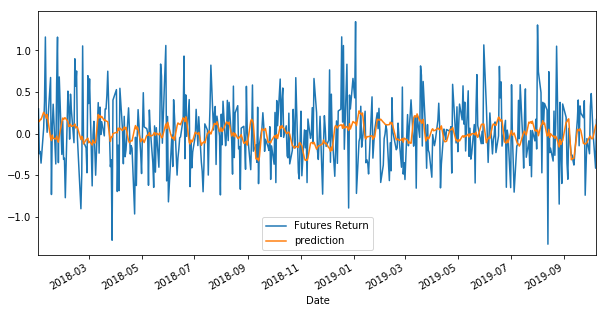

In [58]:
y_df['2018':].plot(figsize=(10,5))

In [59]:
# Plot the two from 2018 onward
# YOUR CODE HERE 

 Separately, plot the calendar effects estimated from the model using matplotlib. Do you see any seasonal patterns?

In [60]:
# Construct a dataframe of the model calendar-effect coefficients and review the output:
results = pd.DataFrame(model.coef_, columns=["Coefficient"], index=X_binary_encoded.columns)

# Filter results so that it only includes either the day-of-week or week-of-year effect 
results = (results[results.index.str.contains("Week of Year")])

results.head(10)

,Coefficient
Week of Year_1,-150050133186.058746338
Week of Year_2,-150050133185.977416992
Week of Year_3,-150050133186.269561768
Week of Year_4,-150050133186.266326904
Week of Year_5,-150050133186.042999268
Week of Year_6,-150050133186.108337402
Week of Year_7,-150050133186.107147217
Week of Year_8,-150050133186.292633057
Week of Year_9,-150050133186.294738770
Week of Year_10,-150050133186.324279785


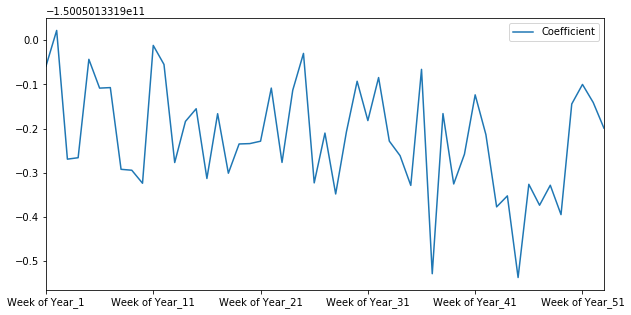

In [61]:
results.plot(figsize=(10,5))

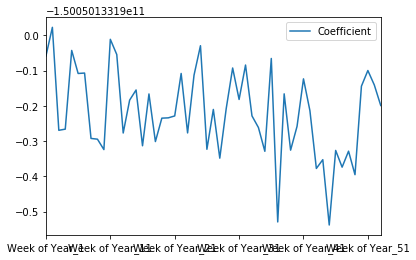

In [62]:
results.plot()

In [63]:
results.head()

,Coefficient
Week of Year_1,-150050133186.058746338
Week of Year_2,-150050133185.977416992
Week of Year_3,-150050133186.269561768
Week of Year_4,-150050133186.266326904
Week of Year_5,-150050133186.042999268


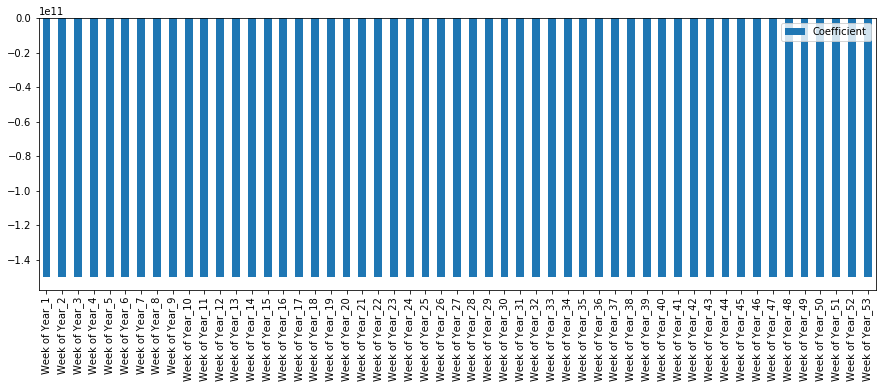

In [64]:
results.plot.bar(figsize=(15,5))

In [65]:
# Plot the results of the individual seasonal effects using pandas df.plot()
# YOUR CODE HERE 

 # Return Forecasting: Autocorrelation and the ARMA Model

 Using futures Settle *Returns*, estimate an ARMA model.
 1. Set the AR and MA ("p" and "q") parameters to p=2 and q=1.
 2. Plot autocorrelation and partial correlation graphs with an alpha of 0.10 and lags=30. If, when looking at the correlation graphs, additional lags seem important for predicting returns, increase the number of lags in the ARMA model from (1).
 3. Does increasing the number of "p" or "q" increase the ability of the model? Compare your results between the two models by comparing the Bayseian Information Criterion, or BIC.

In [66]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [67]:
# Create a series using "Settle" price percentage returns, and drop any nan's:
returns = fut[["Settle"]].pct_change().dropna()
returns.head()

,Settle
Date,
1990-01-03,0.005841975
1990-01-04,0.017569334
1990-01-05,-0.008276256
1990-01-08,0.001294964
1990-01-09,-0.006322748


In [68]:
# Estimate and ARMA model using statsmodels
# Hint: ARMA(df, order=(p, q)).fit()
autoregressive_count = 2
moving_average_window = 1
model = ARMA(returns.values, order=(2,1)).fit() 
model

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7509
Model:                     ARMA(2, 1)   Log Likelihood               26689.832
Method:                       css-mle   S.D. of innovations              0.007
Date:                Wed, 09 Oct 2019   AIC                         -53369.663
Time:                        00:44:43   BIC                         -53335.044
Sample:                             0   HQIC                        -53357.776
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.574e-05    7.9e-05      0.832      0.405   -8.91e-05       0.000
ar.L1.y       -0.4241      2.636     -0.161      0.872      -5.590       4.742
ar.L2.y       -0.0038      0.049     -0.078      0.938      -0.100       0.093
ma.L1.y        0.4125      2.635      0.157      0.876      -4.753       5.578
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4106           +0.0000j            2.4106            0.5000
AR.2         -107.9366           +0.0000j          107.9366            0.5000
MA.1           -2.4243           +0.0000j            2.4243            0.5000
-----------------------------------------------------------------------------
"""

In [70]:
# Output model summary results:
# YOUR CODE HERE 

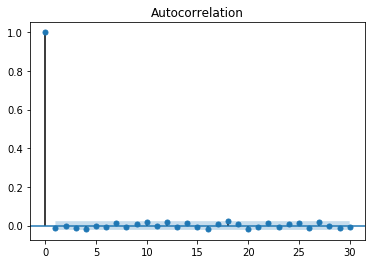

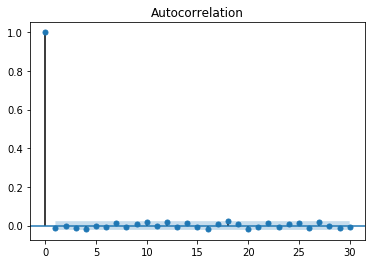

In [71]:
plot_acf(returns, lags=30)

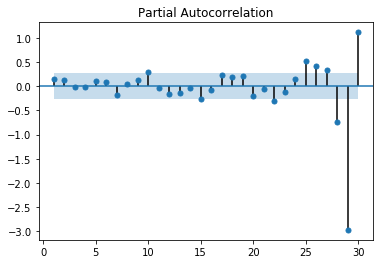

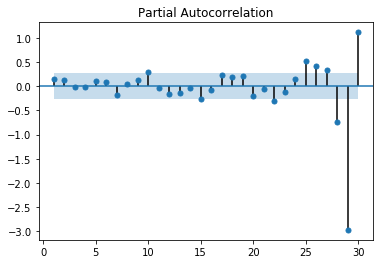

In [72]:
plot_pacf(results, lags=30, zero=False)

In [73]:
# Plot autocorrelation and partial correlation graphs with an alpha of 0.10 and lags=30.

# Autocorrelation (For detecting # of MA ("P") Lags)
# YOUR CODE HERE 

# Partial Autocorrelation (For detecting # of MA ("P") Lags)
# YOUR CODE HERE 

In [74]:
returns.head()

,Settle
Date,
1990-01-03,0.005841975
1990-01-04,0.017569334
1990-01-05,-0.008276256
1990-01-08,0.001294964
1990-01-09,-0.006322748


In [52]:
autoregressive_count = 17
moving_average_window = 6

model = ARMA(returns.values, order=(17,6)).fit() 
model

LinAlgError: SVD did not converge

In [21]:
autoregressive_count = 17
moving_average_window = 6

# Esimate your model based on your interpretation of the autocorrelation/partial autocorrelation plots:
model = # YOUR CODE HERE 

# Review model summary results:
# YOUR CODE HERE 

/Users/cyb/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Settle   No. Observations:                 1345
Model:                    ARMA(17, 6)   Log Likelihood                5104.300
Method:                       css-mle   S.D. of innovations              0.005
Date:                Sun, 07 Jul 2019   AIC                         -10158.601
Time:                        22:05:34   BIC                         -10028.497
Sample:                             0   HQIC                        -10109.868
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.498e-05      0.000     -0.159      0.874      -0.000       0.000
ar.L1.Settle     -0.0092      1.166     -0.008      0.994      -2.294       2.275
ar.L2.Settle      0.1173      0.761      0.154      0.877      -1.373       1.608
ar.L3.Settle     -0.1401      0.348     -0.403      0.687      -0.821       0.541
ar.L4.Settle     -0.4151      0.430     -0.965      0.335      -1.258       0.428
ar.L5.Settle     -0.4680      0.706     -0.663      0.508      -1.852       0.916
ar.L6.Settle      0.5746      1.001      0.574      0.566      -1.387       2.536
ar.L7.Settle      0.0406      0.063      0.646      0.518      -0.083       0.164
ar.L8.Settle     -0.0099      0.085     -0.117      0.907      -0.176       0.156
ar.L9.Settle     -0.0858      0.053     -1.612      0.107      -0.190       0.019
ar.L10.Settle    -0.0198      0.084     -0.235      0.815      -0.185       0.146
ar.L11.Settle     0.1056      0.081      1.312      0.190      -0.052       0.263
ar.L12.Settle     0.0032      0.091      0.035      0.972      -0.174       0.181
ar.L13.Settle    -0.0596      0.056     -1.074      0.283      -0.168       0.049
ar.L14.Settle    -0.0379      0.067     -0.562      0.574      -0.170       0.094
ar.L15.Settle     0.0529      0.085      0.621      0.534      -0.114       0.220
ar.L16.Settle     0.0244      0.041      0.600      0.549      -0.055       0.104
ar.L17.Settle    -0.0063      0.050     -0.126      0.900      -0.104       0.092
ma.L1.Settle     -0.0015      1.166     -0.001      0.999      -2.287       2.284
ma.L2.Settle     -0.0690      0.750     -0.092      0.927      -1.538       1.400
ma.L3.Settle      0.1817      0.389      0.467      0.641      -0.581       0.945
ma.L4.Settle      0.3985      0.499      0.798      0.425      -0.580       1.377
ma.L5.Settle      0.4197      0.736      0.570      0.569      -1.024       1.863
ma.L6.Settle     -0.5153      0.963     -0.535      0.593      -2.403       1.373
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.6838           -0.7725j            1.0317           -0.1347
AR.2             0.6838           +0.7725j            1.0317            0.1347
AR.3             1.2914           -0.0000j            1.2914           -0.0000
AR.4             1.2093           -0.5319j            1.3211           -0.0659
AR.5             1.2093           +0.5319j            1.3211            0.0659
AR.6             0.6457           -1.0403j            1.2244           -0.1616
AR.7             0.6457           +1.0403j            1.2244            0.1616
AR.8            -0.2092           -1.2216j            1.2394           -0.2770
AR.9            -0.2092           +1.2216j            1.2394            0.2770


 # Return Forecasting: Deploying the ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags

 2. Plot the residuals from the model. If residuals are the part of returns that our model *doesn"t* explain, does it seem like our model has missed any seasonality?
 3. Construct a 15 day (3 week) forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [75]:
returns_arima = fut[["Settle"]]
returns_arima.head()

,Settle
Date,
1990-01-02,6847.000000000
1990-01-03,6887.000000000
1990-01-04,7008.000000000
1990-01-05,6950.000000000
1990-01-08,6959.000000000


In [76]:
# For ARIMA, construct a dataframe using just the futures "Settle" prices:
df = # YOUR CODE HERE 
df.head()

SyntaxError: invalid syntax (<ipython-input-76-f283e21a1f6e>, line 2)

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
model_arima = ARIMA(fut.Settle.values, order=(5, 1, 1))
model_arima

In [79]:
model_fit = model_arima.fit()

In [80]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 7509
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41918.266
Method:                       css-mle   S.D. of innovations             64.294
Date:                Wed, 09 Oct 2019   AIC                          83852.531
Time:                        00:45:21   BIC                          83907.922
Sample:                             1   HQIC                         83871.551
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3363      0.700      0.480      0.631      -1.036       1.709
ar.L1.D.y      0.2807      0.709      0.396      0.692      -1.108       1.669
ar.L2.D.y      0.0005      0.016      0.032      0.9

                             ARIMA Model Results                              
Dep. Variable:               D.Settle   No. Observations:                 1345
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7153.142
Method:                       css-mle   S.D. of innovations             49.371
Date:                Sun, 07 Jul 2019   AIC                          14322.283
Time:                        22:06:39   BIC                          14363.916
Sample:                             1   HQIC                         14337.878
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3845      1.385     -0.278      0.781      -3.098       2.329
ar.L1.D.Settle    -0.6682      0.288     -2.323      0.020      -1.232      -0.104
ar.L2.D.Settle     0.0407      0.033

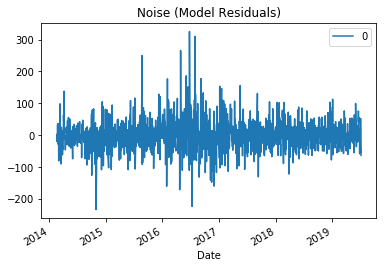

                   0
count 1345.000000000
mean     0.001503358
std     49.389742669
min   -233.607904105
25%    -27.690635374
50%     -0.403362484
75%     25.313943148
max    325.375471649


In [23]:
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = # YOUR CODE HERE 
model_fit = # YOUR CODE HERE 
# Output model summary results:
print(model_fit.summary())
# plot residual errors:
residuals = # YOUR CODE HERE 

residuals.plot(title="Noise (Model Residuals)")
plt.show()
print(residuals.describe())

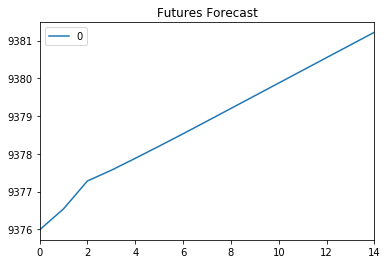

In [81]:
pd.DataFrame(model_fit.forecast(steps=15)[0]).plot(title="Futures Forecast")

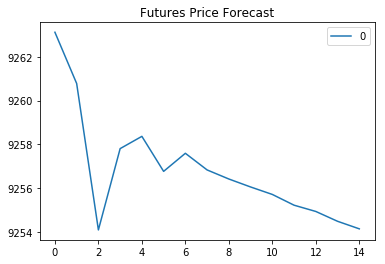

In [25]:
# Construct a 15 day (3 week) forecast for the Settle Price. 
# What does the model forecast will happen to the Japanese Yen in the near term?
# Specifically, construct a pandas DataFrame containing ARIMA model forecasts for a 15-day window:
# YOUR CODE HERE 

 # Volatility Forecasting

 Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.

### Volatility Forecasting: GARCH and EGARCH Models
Using the "arch" package, estimate either GARCH(1,1) or an EGARCH(p,q) volatility forecast model on futures settle returns.

In [85]:
import arch as arch
from arch import arch_model

In [86]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by *100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns=(fut[["Settle"]].pct_change()*100)
returns=returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-02,0.482392668
2019-10-03,0.256040967
2019-10-04,0.021282256
2019-10-07,-0.414915687
2019-10-08,0.170931040


In [91]:
am = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

In [92]:
# Estimate a GARCH(1,1) model using the "arch" package:
# (We need to drop all NaN"s first in order to get this to run):

res = am.fit(disp="off")

In [93]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7459.15
Distribution:                  Normal   AIC:                           14924.3
Method:            Maximum Likelihood   BIC:                           14945.1
                                        No. Observations:                 7509
Date:                Wed, Oct 09 2019   Df Residuals:                     7506
Time:                        00:49:13   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2999e-03  1.802e-03      2.387  1.700e-02 [7.687e-04,7.831e-03]
alpha[1]       0.0381  8.768e-03      4.343  1.409e-05 [2.089e-02,5.526e-02]
beta[1]        0.9536  1.114e-02     85.636      0.000     [  0.932,  0.975]
============================================================================

Covariance estimator: robust
"""

                           AR - GARCH Model Results                           
Dep. Variable:                 Settle   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1025.22
Distribution:                  Normal   AIC:                           2062.44
Method:            Maximum Likelihood   BIC:                           2093.66
                                        No. Observations:                 1343
Date:                Sun, Jul 07 2019   Df Residuals:                     1337
Time:                        22:06:40   Df Model:                            6
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -4.5850e-03  1.273e-02     -0.360      0.

In [94]:
# Output the summary results of the GARCH model:
print(res.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7459.15
Distribution:                  Normal   AIC:                           14924.3
Method:            Maximum Likelihood   BIC:                           14945.1
                                        No. Observations:                 7509
Date:                Wed, Oct 09 2019   Df Residuals:                     7506
Time:                        00:49:13   Df Model:                            3
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2999e-03  1.802e-03      2.387  1.700e-02 [7.

### Volatility Forecasting: Identifying Patterns of Clustered Volatility

GARCH/EGARCH, etc. models are good for capturing the "volatility clustering" effect that is common in financial data. After estimating your model, can you identify periods when volatility clusters together?

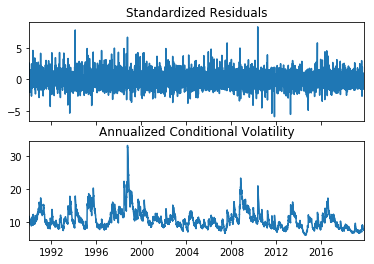

In [95]:
# Plot the model"s conditional volatility for the Yen:
# Hint: use .plot(annualize="D")
fig = res.plot(annualize='D')

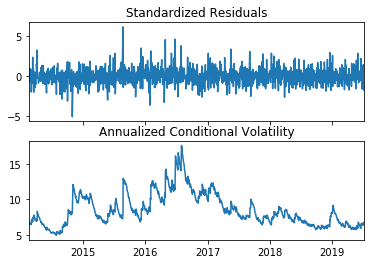

### Volatility Forecasting: 3-day Yen Volatility Forecasts using GARCH/EGARCH
  * Let's do some forecasting of near-term risk. Specifically, use the .forecast() method to calculate 3-day forecasts. Then plot the resulting 3-day annualized variance. Is Yen volatility expected to rise or fall in the near term?

In [35]:
# Note--You can either specify today"s date manually, or use pd.datetime.today().strftime("%Y-%m-%d") 
# (example format: start="2019-06-28")
# If you have problems with datetime, 
# specify data date manually using the most recent trading date in the dataframe
todays_date = pd.datetime.today().strftime("%Y-%m-%d")                  
# todays_date = '2019-07-05'
# Forecast volatility, from today"s date until the following three days:
forecast_horizon = # YOUR CODE HERE 
forecasts = # YOUR CODE HERE 
forecasts

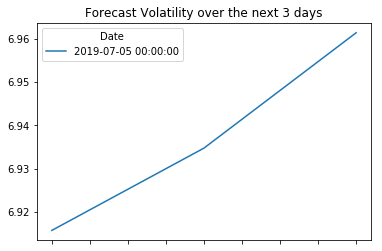

In [36]:
# Plot the annualized volatility forecast using pd.plot():
# (Make sure to use dropna() on the forecasts before plotting):
# (There are 252 trading days in a year)
# Note: each column in forecasts.variance represents one day ahead: 
plot_title = f"Forecast Volatility over the next {forecast_horizon} days"
model_forecasts = # YOUR CODE HERE 
model_forecasts.dropna().T.plot(title=plot_title) 

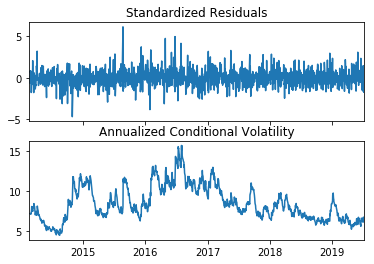

In [38]:
fig = # YOUR CODE HERE 

 # Out-of-Sample Predictions
 So far, you"ve used the full dataset to construct a model. Let's try a more rigorous technique.

### Out-of-Sample Predictions: Slicing the Data into Training and Test Set ("One Shot" Approach)

Using the SKLearn regression model and just lagged returns as the independent variable, start by estimating a model using **training data** from January, 2015 through December 2017.

In [75]:
# If you haven"t already, create and add "Futures Return" and "Lagged Futures Return" variables to your dataframe:
# Replace inf, -inf with np.nan, then drop any row with at least one np.nan in the dataframe
fut["Futures Return"] = # YOUR CODE HERE 
fut["Lagged Return"] = # YOUR CODE HERE 
fut = fut.replace(-np.inf, np.nan).dropna()
fut[["Futures Return", "Lagged Return"]].head()

,Futures Return,Lagged Return
Date,,
2014-03-04,-0.801298306,0.346055980
2014-03-06,-0.766871166,-0.801298306
2014-03-07,-0.247295209,-0.766871166
2014-03-10,0.103295114,-0.247295209
2014-03-11,0.278609019,0.103295114


In [76]:
# Using datetime index slicing, create a "training" data dataframe using data from just 2015-01-01 to 2017-12-31
train = # YOUR CODE HERE 
print("Training set covers from ", train.index.min(), " to ", train.index.max())
train.head(2)

Training set covers from  2015-01-02 00:00:00  to  2017-12-29 00:00:00


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Futures Return,Lagged Return
Date,,,,,,,,,,
2015-01-02,8352.000000000,8353.000000000,8286.000000000,8310.000000000,34.000000000,8315.000000000,101438.000000000,222022.000000000,-0.407234399,-0.262812089
2015-01-05,8305.000000000,8382.000000000,8293.000000000,8371.000000000,56.000000000,8371.000000000,165487.000000000,226085.000000000,0.673481660,-0.407234399


In [77]:
# Using datetime index slicing, create a "test" data dataframe using data from 2018-01-01 through the end of the data
test = # YOUR CODE HERE 
print("Test set covers from ", test.index.min(), " to ", test.index.max())
test.head(2)

Test set covers from  2018-01-02 00:00:00  to  2019-07-05 00:00:00


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Futures Return,Lagged Return
Date,,,,,,,,,,
2018-01-02,8909.500000000,8957.500000000,8898.500000000,8938.000000000,26.500000000,8940.500000000,96714.000000000,227884.000000000,0.297285169,0.224870699
2018-01-03,8943.000000000,8947.500000000,8913.000000000,8921.000000000,21.500000000,8919.000000000,93498.000000000,226582.000000000,-0.240478720,0.297285169


  * Then use the model developed on a test set using data from 2018 onward.

In [78]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = # YOUR CODE HERE 
y_train = # YOUR CODE HERE 
X_test = # YOUR CODE HERE 
y_test = # YOUR CODE HERE 

In [79]:
# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
# YOUR CODE HERE 

# Score how that model works using only the test data
# YOUR CODE HERE 

# And make a prediction of "y" values for just the test dataset
predictions = # YOUR CODE HERE 

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

In [80]:
Results.head()

,Futures Return,Predicted Return
Date,,
2018-01-02,0.297285169,0.004644804
2018-01-03,-0.240478720,0.002612746
2018-01-04,-0.213028366,0.017703208
2018-01-05,-0.353932584,0.016932910
2018-01-08,0.062017252,0.020886894



  * Compare the RMSE from the model using the test sample to the RMSE when using the full-sample. Are the results surprising?

In [81]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = # YOUR CODE HERE 

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
one_shot_rmse = # YOUR CODE HERE 
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {one_shot_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.40994570155874877


In [82]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = # YOUR CODE HERE 

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = # YOUR CODE HERE 

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = # YOUR CODE HERE 
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.6257993297323167


### Out-of-Sample Predictions: The Rolling Out-of-Sample Approach

Let's take the model above (i.e., SKLearn predicting futures returns with lagged futures returns), but apply it using a rolling, out of sample approach. This method, which is specific to time-series predictions, will be a more realistic and more rigorous approximation of how the model would perform in real life.

Specifically, start at the beginning of the dataset and "roll forward" one week at a time, using a 26-week (6 month) rolling training window.

In [83]:
# Main Idea: Each week, re-estimate the model, then trade on it the following week. 
# Continue this "out of sample" approach throughout the dataset.

In [84]:
# Construct an empty placeholder dataframe, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we"ll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
# Construct an empty placeholder dataframe, with a column named "Actual Returns"
# (Each iteration of the loop, we"ll append that week"s predictions to this DataFrame)
all_actuals = pd.DataFrame(columns=["Actual Returns"])

# construct a list of all pandas weekly periods that are in the dataset:
weeks = fut.index.to_period("w").unique()

# Specify a training window (26 weeks (6 months) of data)
training_window = 26  

# Write a for loop that iterates from 0 to the number of weeks (minus the training window) in the dataset:
# We have to subtract the length of the training window because
# Going beyond this goes beyond the length of our dataset    
for i in range(0, (len(weeks) - training_window - 1)):
# Create an datetime object to mark the beginning of the training window (which changes, for each "i"):     
    beginning_training_week = # YOUR CODE HERE 
# Create a string variable from that time object with format="%Y-%m-%d"
    start_training_period = # YOUR CODE HERE 
# Create an datetime object to mark the ending of the training window (which would be "i"+training_window_length):  
    ending_training_week = # YOUR CODE HERE 
# Create a string variable from that time object with format="%Y-%m-%d"
    end_training_period = # YOUR CODE HERE 
# Create a datetime object that marks the week of test-window data:
    test_week = # YOUR CODE HERE 
# Create a string variable from the beginning of that time object with format="%Y-%m-%d"
    start_test_week = # YOUR CODE HERE 
# Create a string variable from the end of that time object with format="%Y-%m-%d"    
    end_test_week = # YOUR CODE HERE 
# Create a dataframe that includes only data during the training window
# (Use datetime slicing and the two start and end string dates constructed above):
    train =  # YOUR CODE HERE 
# Do the same to construct a dataframe including data in the test sample window:    
    test =  # YOUR CODE HERE 
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
    X_train = train["Lagged Return"].to_frame()
    y_train = train["Futures Return"]
    X_test = test["Lagged Return"].to_frame()
    y_test = test["Futures Return"]
# Fit a linear regression to the two training dataframes
    # YOUR CODE HERE 
# Use the model to construct predictions on the X test dataframe,
# and save them as a temporary pandas DataFrame 
    predictions =  # YOUR CODE HERE 
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
# Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
# Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   
    # Once the loop is done, concatenate (combine) the two dataframes to a final "Results" dataframe:    
    Results =  # YOUR CODE HERE 


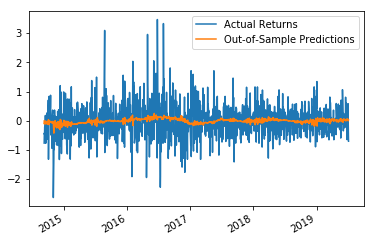

In [85]:
# Plot the results:
# YOUR CODE HERE 

  * Evaluate the model RMSE.
      * Which has the better RMSE--this more robust method, or the single ("one-shot") training and test split just above?

In [86]:
# Calculate the mean_squared_error on the Results DataFrame:
# (This compares the average (squared) difference between actual and model-predicted returns)
rolling_mse = # YOUR CODE HERE 
# Then use that to calculate the Root-Mean-Squared Error (RMSE):
rolling_rmse = # YOUR CODE HERE 
rolling_rmse

0.5738123732985758

In [87]:
# Compare the RMSE from the training-testing single split versus the rolling out-of-sample approach we just did:
# YOUR CODE HERE 

0.40994570155874877

Challenge: Can you calculate the out-of-sample R2? Based on this, should we bet money on this model?

In [89]:
# YOUR CODE HERE 

Out-of-Sample R-squared: -0.022563606609533604
